<a href="https://colab.research.google.com/github/FARSHAD-SH/CV/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Open a new notebook in GoogleColab for python3. Run the following code for activating tensorflow version 2.0:

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception: 
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


2. Import tensorflow, keras, numpy and matplot using the following code:

In [ ]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

3. Check your tensorflow version using:

In [ ]:
print(tf.__version__)

2.8.2


4. Import the cifra10 data set. 

In [ ]:
data = keras.datasets.cifar10 
cifar10_data = data.load_data()

170508288/170498071 [==============================] - 3s 0us/step


5. Before using a dataset, the datatype should be checked.

In [ ]:
print(type(cifar10_data))
print(len(cifar10_data))

<class 'tuple'>
2


6. Load train and test images and labels

In [ ]:
(train_images , train_labels),(test_images , test_labels) = cifar10_data

7. The images are 32 × 32 NumPy arrays, with pixel values ranging from 0 to 255. You can check an example

In [ ]:
print(train_images[0]) 
print(train_images.shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(50000, 32, 32, 3)


In [ ]:
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

8. Before training the model, explore the datasets. Number of train and test points, their array size and etc.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9. An interesting fact about the image is that you can plot the image.

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

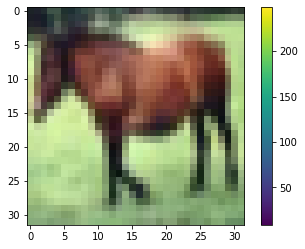

[7]


'horse'

In [ ]:
index = 7
plt.figure()
plt.imshow(train_images[index]) 
plt.colorbar()
plt.grid(False) 
plt.show()

print(train_labels[index])
class_names[train_labels[index][0]]

10. To verify that the data is in the correct format and that you’re ready to build and train the network

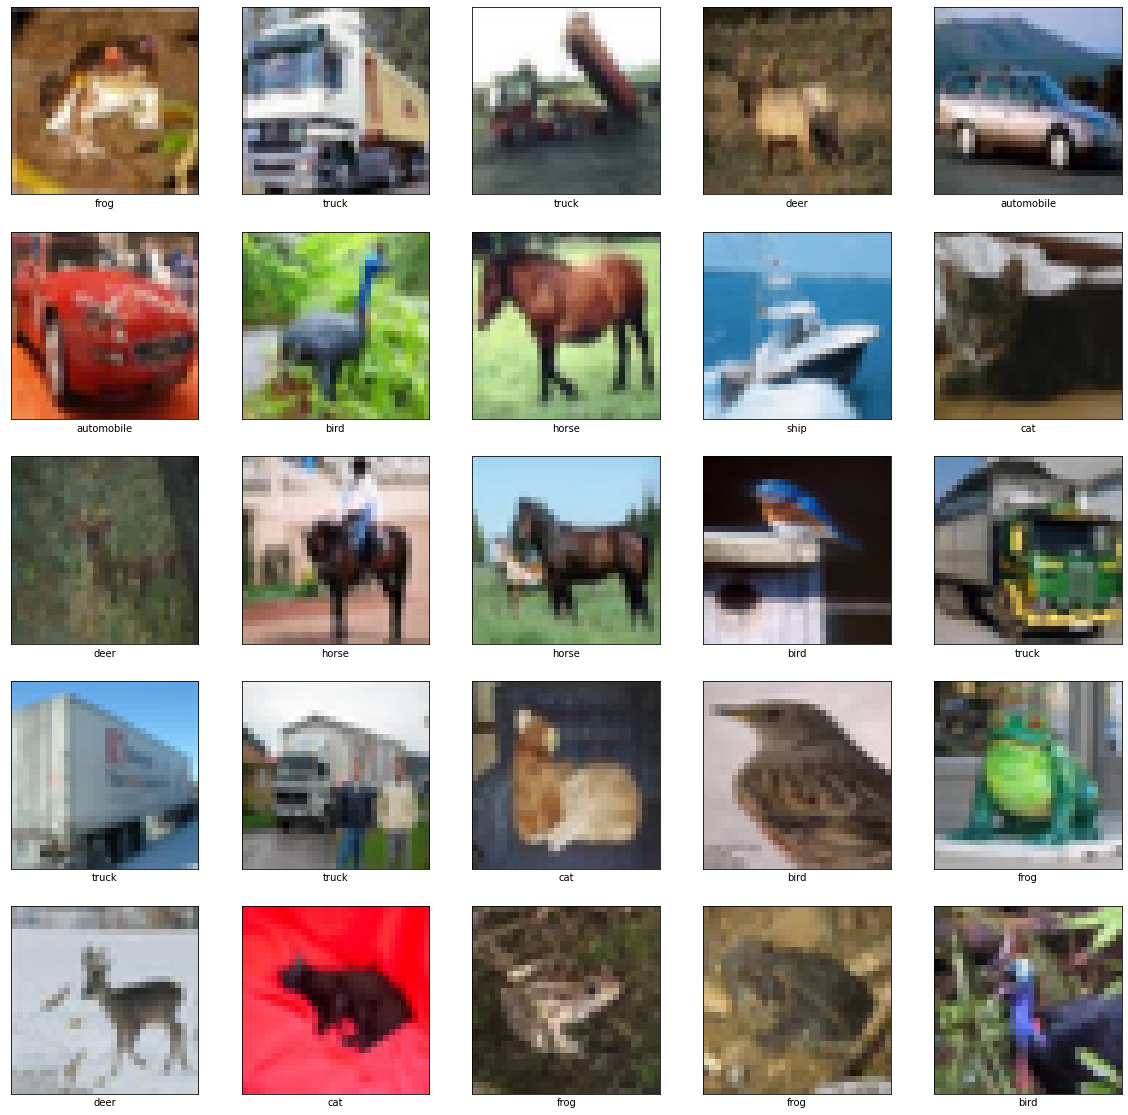

In [ ]:
plt.figure(figsize=(20, 20))
for x in range(0, 25):
  plt.subplot(5,5, x+1) 
  plt.xticks([])
  plt.yticks([]) 
  plt.grid(False)
  plt.imshow(train_images[x])
  plt.xlabel(class_names[train_labels[x,0]])

11. normalise train and test sets

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

12. First neural network definition with three layers and two activation functions

In [ ]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')])

13. Before the model is ready for training, it needs a few more settings. 

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

14. Training the neural network model

In [ ]:
model.fit(train_images , train_labels , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8764 - accuracy: 0.3262
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7413 - accuracy: 0.3794
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6970 - accuracy: 0.3955
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6570 - accuracy: 0.4074
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6251 - accuracy: 0.4204
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5990 - accuracy: 0.4277
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5807 - accuracy: 0.4345
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5703 - accuracy: 0.4376
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5513 - accuracy: 0.4464
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.543

15. It is the moment for checking the model performance on the test dataset.

In [ ]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose =2)

313/313 - 1s - loss: 1.5811 - accuracy: 0.4353 - 1s/epoch - 5ms/step


16. With the model trained, we can use it to make predictions about some images.

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

6

Sentiment Analysis

Import the necessary Libraries

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

1. Load the IMDB dataset

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


2. Take only the first 10000 words from each data sample.

In [ ]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1
    return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [ ]:
tarining_data = data[10000:]
training_targets = targets[10000:]
test_data = data[:10000]
test_targets = targets[:10000]

In [ ]:
# print(data) 
print(tarining_data.shape)
print(training_targets.shape)

(40000, 10000)
(40000,)


3. Build your Neural Network model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50,activation="relu",input_shape=(10000,)),
    # layers.Dropout(0.3)
    keras.layers.Dense(128,activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid')])

4. Compile your model

In [ ]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

5. Fit your model, and get its final accuracy

In [ ]:
model.fit(tarining_data , training_targets , epochs=10)

Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2979 - accuracy: 0.8743
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1857 - accuracy: 0.9254
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1130 - accuracy: 0.9545
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0456 - accuracy: 0.9838
Epoch 5/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.0155 - accuracy: 0.9948
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 8/10
1057/1250 [========================>.....] - ETA: 1s - loss: 0.0080 - accuracy: 0.9972

Regression

Import the Boston Housing dataset

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

1. Visualize each feature and label in your data using a scatterplot. 

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np

In [ ]:
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Scattergl(x=df[column], 
                            y=df['MEDV'], 
                            mode="markers", 
                            marker=dict(size=3)), 
                  row=cur_row, 
                  col=cur_col)
    
    intercept = np.poly1d(np.polyfit(df[column], df['MEDV'], 1))(np.unique(df[column]))
    
    fig.add_trace(go.Scatter(x=np.unique(df[column]), 
                             y=intercept, 
                             line=dict(color='red', width=1)), 
                  row=cur_row, 
                  col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550, showlegend=False)
fig.show()

2. Split your data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

3. Normalize your training and testing subsets

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # compute required values
# scaler = StandardScaler()
# model_train = scaler.fit(X_train)
# scaled_X_train = model_train.transform(X_train)
# model_test = scaler.fit(X_test)
# scaled_X_test = model_test.transform(X_test)
 
# # print scaled data
# print(scaled_X_test)
# X_train.shape

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

4. Build your keras neural network model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = keras.Sequential([
    keras.layers.Dense(128,activation="relu",input_shape=(13,)),
    # layers.Dropout(0.3)
    keras.layers.Dense(64,activation='relu'), 
    keras.layers.Dense(1,activation='linear')])

5. Compile your model and view its summary.

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


6. Train your model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 560.8381 - mae: 21.8160 - val_loss: 556.8877 - val_mae: 21.7408
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 482.0626 - mae: 19.9726 - val_loss: 470.6581 - val_mae: 19.8390
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 390.8552 - mae: 17.6565 - val_loss: 364.7874 - val_mae: 17.2296
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 281.9391 - mae: 14.6346 - val_loss: 243.1101 - val_mae: 13.6417
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 169.0165 - mae: 10.8565 - val_loss: 134.9909 - val_mae: 9.6147
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 94.1526 - mae: 7.7086 - val_loss: 70.1054 - val_mae: 6.7186
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 61.7570 - mae: 5.9821 - val_loss: 44.2961 - val_mae: 5.3619
Epoch 8/100
11/11 [==============================

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

7. Evaluate your model using model.evaluate

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 18.2452 - mae: 2.6979
Mean squared error on test data:  18.245201110839844
Mean absolute error on test data:  2.6978652477264404


8. Compare your model’s performance vs that of an sklearn Linear Regression model

Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  28.405854810508238
Mean absolute error on test data:  3.691362677116256


Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)

print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  19.61401315789474
Mean absolute error on test data:  2.9335526315789475
